In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


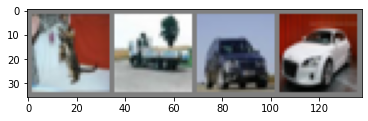

  cat truck   car   car


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 256, 3, 1,padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=256)
        self.conv2 = nn.Conv2d(256, 128, 3,1,padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=128)
        self.conv3 = nn.Conv2d(128, 64, 3,1,padding=1)
        # self.bn3 = nn.BatchNorm2d(num_features=64)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(64 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)


    def forward(self, x):
        x = self.pool(F.elu(self.bn1(self.conv1(x))))
        x = self.pool(F.elu(self.bn2(self.conv2(x))))
        x = self.pool(F.elu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.elu(self.fc1(x))
        x = F.elu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [8]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.771
[1,  4000] loss: 1.450
[1,  6000] loss: 1.314
[1,  8000] loss: 1.218
[1, 10000] loss: 1.154
[1, 12000] loss: 1.118
[2,  2000] loss: 1.001
[2,  4000] loss: 0.988
[2,  6000] loss: 0.978
[2,  8000] loss: 0.938
[2, 10000] loss: 0.933
[2, 12000] loss: 0.937
[3,  2000] loss: 0.825
[3,  4000] loss: 0.836
[3,  6000] loss: 0.824
[3,  8000] loss: 0.812
[3, 10000] loss: 0.804
[3, 12000] loss: 0.814
[4,  2000] loss: 0.721
[4,  4000] loss: 0.711
[4,  6000] loss: 0.735
[4,  8000] loss: 0.741
[4, 10000] loss: 0.754
[4, 12000] loss: 0.731
[5,  2000] loss: 0.620
[5,  4000] loss: 0.645
[5,  6000] loss: 0.659
[5,  8000] loss: 0.666
[5, 10000] loss: 0.681
[5, 12000] loss: 0.686
[6,  2000] loss: 0.584
[6,  4000] loss: 0.573
[6,  6000] loss: 0.607
[6,  8000] loss: 0.594
[6, 10000] loss: 0.607
[6, 12000] loss: 0.625
[7,  2000] loss: 0.509
[7,  4000] loss: 0.560
[7,  6000] loss: 0.546
[7,  8000] loss: 0.571
[7, 10000] loss: 0.531
[7, 12000] loss: 0.580
[8,  2000] loss: 0.448
[8,  4000] 

In [0]:
# relu 1.307 -> elu : 1.237 -> 120에서 128 : 1.198 - >

In [0]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

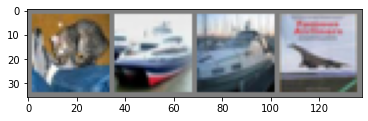

GroundTruth:    cat  ship  ship plane


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse  bird  frog   car


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 73 %


In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 73 %


In [16]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 78 %
Accuracy of  bird : 64 %
Accuracy of   cat : 65 %
Accuracy of  deer : 79 %
Accuracy of   dog : 58 %
Accuracy of  frog : 77 %
Accuracy of horse : 76 %
Accuracy of  ship : 82 %
Accuracy of truck : 83 %


In [17]:
#relu
Accuracy of plane : 54 %
Accuracy of   car : 75 %
Accuracy of  bird : 30 %
Accuracy of   cat : 33 %
Accuracy of  deer : 61 %
Accuracy of   dog : 43 %
Accuracy of  frog : 72 %
Accuracy of horse : 61 %
Accuracy of  ship : 54 %
Accuracy of truck : 54 %

SyntaxError: ignored

In [0]:
#elu
Accuracy of plane : 48 %
Accuracy of   car : 62 %
Accuracy of  bird : 42 %
Accuracy of   cat : 42 %
Accuracy of  deer : 57 %
Accuracy of   dog : 49 %
Accuracy of  frog : 74 %
Accuracy of horse : 53 %
Accuracy of  ship : 64 %
Accuracy of truck : 59 %

In [0]:
57%

In [0]:
60 

In [0]:
63